In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops

In [3]:
def load_happy_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
X_train,Y_train,X_test,Y_test,classes=load_happy_dataset()

In [5]:
X_train=X_train/255
X_test=X_test/255
Y_train=Y_train.T
Y_test=Y_test.T

In [6]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


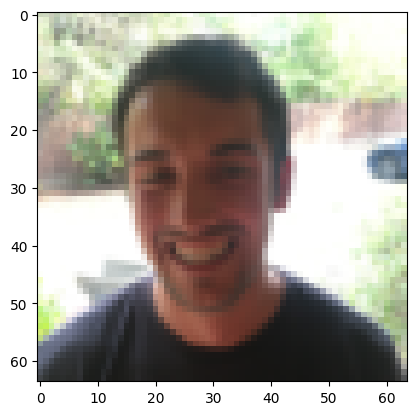

In [7]:
index=12
plt.imshow(X_train[index])

In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=3,input_shape=(64,64,3)),
    tf.keras.layers.Conv2D(32,(7,7),strides=(1,1)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

In [11]:
model.fit(X_train,Y_train,epochs=50,batch_size=16)

Epoch 1/50
38/38 [==============================] - 3s 61ms/step - loss: 0.5514 - accuracy: 0.7967
Epoch 2/50
38/38 [==============================] - 2s 48ms/step - loss: 0.2253 - accuracy: 0.9067
Epoch 3/50
38/38 [==============================] - 2s 53ms/step - loss: 0.1099 - accuracy: 0.9633
Epoch 4/50
38/38 [==============================] - 2s 65ms/step - loss: 0.2749 - accuracy: 0.9133
Epoch 5/50
38/38 [==============================] - 2s 63ms/step - loss: 0.1423 - accuracy: 0.9467
Epoch 6/50
38/38 [==============================] - 2s 57ms/step - loss: 0.1010 - accuracy: 0.9683
Epoch 7/50
38/38 [==============================] - 2s 59ms/step - loss: 0.1017 - accuracy: 0.9650
Epoch 8/50
38/38 [==============================] - 2s 61ms/step - loss: 0.0699 - accuracy: 0.9783
Epoch 9/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0776 - accuracy: 0.9683
Epoch 10/50
38/38 [==============================] - 2s 56ms/step - loss: 0.0609 - accuracy: 0.9817
Epoch 11/

In [12]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 32ms/step - loss: 0.1433 - accuracy: 0.9400


[0.14327149093151093, 0.9399999976158142]

In [13]:
predictions = model.predict(X_test)
print(predictions)
print(np.mean(predictions))

5/5 [==============================] - 0s 30ms/step
[[1.0000000e+00]
 [9.9999619e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.6553733e-01]
 [9.9995023e-01]
 [9.9969476e-01]
 [4.0064619e-06]
 [1.0000000e+00]
 [7.7196893e-07]
 [9.9996173e-01]
 [1.5413130e-05]
 [7.9483968e-01]
 [5.5012748e-02]
 [3.1714278e-06]
 [9.9886370e-01]
 [3.9499454e-10]
 [9.9999958e-01]
 [6.4269251e-08]
 [1.0000000e+00]
 [9.9987948e-01]
 [9.9999845e-01]
 [4.1808948e-02]
 [1.0000000e+00]
 [2.6612444e-08]
 [1.9607826e-07]
 [9.7150624e-01]
 [3.2577451e-04]
 [1.5988125e-01]
 [1.0000000e+00]
 [9.9998510e-01]
 [1.0000000e+00]
 [9.9915123e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.1488180e-02]
 [7.7868290e-06]
 [1.1229733e-03]
 [4.0882352e-07]
 [2.9628637e-01]
 [8.4857885e-07]
 [1.1566065e-04]
 [1.7698910e-06]
 [1.0000000e+00]
 [1.1808811e-07]
 [2.8987532e-09]
 [1.2945945e-08]
 [9.9999315e-01]
 [4.8825626e-08]
 [5.4645927e-08]
 [6.2775339e-06]
 [8.7349463e-01]
 [8.3413655e-01]
 [4.0475893e-06]
 [9.9999964e-

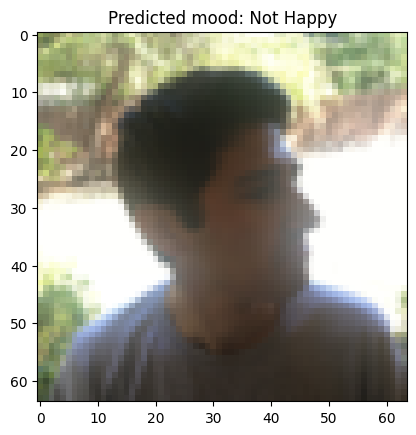

In [20]:
index=18
plt.imshow(X_test[index])
plt.title(f'Predicted mood: {"Happy" if predictions[index][0] > 0.516188 else "Not Happy"}')
plt.show()